<a href="https://colab.research.google.com/github/Adazz10/Projetinho-1/blob/main/Projetinho_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Conhecendo os dados de treino e de teste

In [13]:
# Importando as bibliotecas.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from natsort import natsorted, ns
from natsort import natsort_keygen
%matplotlib inline

In [14]:
# Importando os datasets sobre cientistas de dados.

test = pd.read_csv("test.csv")     # O dataset que será usado para previsão.
train = pd.read_csv("train.csv")   # O dataset que será usado para o treino.

In [15]:
# Vendo um pouco do dataset de treino

train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [ ]:
# Vendo um pouco do dataset de teste

test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [ ]:
# Vendo informações gerais sobre o dataset de teste

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             2129 non-null   int64  
 1   city                    2129 non-null   object 
 2   city_development_index  2129 non-null   float64
 3   gender                  1621 non-null   object 
 4   relevent_experience     2129 non-null   object 
 5   enrolled_university     2098 non-null   object 
 6   education_level         2077 non-null   object 
 7   major_discipline        1817 non-null   object 
 8   experience              2124 non-null   object 
 9   company_size            1507 non-null   object 
 10  company_type            1495 non-null   object 
 11  last_new_job            2089 non-null   object 
 12  training_hours          2129 non-null   int64  
dtypes: float64(1), int64(2), object(10)
memory usage: 216.4+ KB


In [ ]:
# Vendo informações gerais sobre o dataset de treino

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
# Vendo a quantidade de nulos no data de treino

train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [ ]:
# Vendo a quantidade de nulos no data de teste

test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [ ]:
# pd.concat é para unir os 2 datasets, fiz isso para 
# analisar ambos de uma vez com os comandos.
# ignore_index é para compartilharem um mesmo novo index.

juntos = pd.concat([train, test], ignore_index= True) 

In [ ]:
# Vendo as informações gerais 

juntos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21287 entries, 0 to 21286
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             21287 non-null  int64  
 1   city                    21287 non-null  object 
 2   city_development_index  21287 non-null  float64
 3   gender                  16271 non-null  object 
 4   relevent_experience     21287 non-null  object 
 5   enrolled_university     20870 non-null  object 
 6   education_level         20775 non-null  object 
 7   major_discipline        18162 non-null  object 
 8   experience              21217 non-null  object 
 9   company_size            14727 non-null  object 
 10  company_type            14513 non-null  object 
 11  last_new_job            20824 non-null  object 
 12  training_hours          21287 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [ ]:
juntos.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    5016
relevent_experience          0
enrolled_university        417
education_level            512
major_discipline          3125
experience                  70
company_size              6560
company_type              6774
last_new_job               463
training_hours               0
target                    2129
dtype: int64

In [ ]:
juntos

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21282,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15,NaN
21283,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30,NaN
21284,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18,NaN
21285,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84,NaN


# Limpandos ambos os dados

In [ ]:
juntos["enrollee_id"].describe()

count    21287.000000
mean     16873.983652
std       9612.131237
min          1.000000
25%       8554.500000
50%      16967.000000
75%      25161.500000
max      33380.000000
Name: enrollee_id, dtype: float64

In [ ]:
juntos["city"].sort_values().unique()

array(['city_1', 'city_10', 'city_100', 'city_101', 'city_102',
       'city_103', 'city_104', 'city_105', 'city_106', 'city_107',
       'city_109', 'city_11', 'city_111', 'city_114', 'city_115',
       'city_116', 'city_117', 'city_118', 'city_12', 'city_120',
       'city_121', 'city_123', 'city_126', 'city_127', 'city_128',
       'city_129', 'city_13', 'city_131', 'city_133', 'city_134',
       'city_136', 'city_138', 'city_139', 'city_14', 'city_140',
       'city_141', 'city_142', 'city_143', 'city_144', 'city_145',
       'city_146', 'city_149', 'city_150', 'city_152', 'city_155',
       'city_157', 'city_158', 'city_159', 'city_16', 'city_160',
       'city_162', 'city_165', 'city_166', 'city_167', 'city_171',
       'city_173', 'city_175', 'city_176', 'city_179', 'city_18',
       'city_180', 'city_19', 'city_2', 'city_20', 'city_21', 'city_23',
       'city_24', 'city_25', 'city_26', 'city_27', 'city_28', 'city_30',
       'city_31', 'city_33', 'city_36', 'city_37', 'city_39

In [ ]:
juntos["city_development_index"].describe()

count    21287.000000
mean         0.828462
std          0.123537
min          0.448000
25%          0.739000
50%          0.903000
75%          0.920000
max          0.949000
Name: city_development_index, dtype: float64

In [ ]:
juntos["gender"].unique()

array(['Male', nan, 'Female', 'Other'], dtype=object)

In [ ]:
juntos.rename(columns = {'relevent_experience': "relevant_experience"}, inplace = True)
# Troquei pq eu ficava errando toda vez que eu escrevia o nome da coluna em 
# razão dela estar com o nome gramaticalmente incorreto.

In [ ]:
juntos["relevant_experience"].unique()

array(['Has relevent experience', 'No relevent experience'], dtype=object)

In [ ]:
juntos['relevant_experience'].replace('Has relevent experience', 'Has relevant experience', inplace = True)
juntos['relevant_experience'].replace('No relevent experience', 'No relevant experience', inplace = True)
# Agora eu corrijo as strings

In [ ]:
juntos["enrolled_university"].unique()

array(['no_enrollment', 'Full time course', nan, 'Part time course'],
      dtype=object)

In [ ]:
juntos["education_level"].unique()

array(['Graduate', 'Masters', 'High School', nan, 'Phd', 'Primary School'],
      dtype=object)

In [ ]:
juntos["major_discipline"].unique()

array(['STEM', 'Business Degree', nan, 'Arts', 'Humanities', 'No Major',
       'Other'], dtype=object)

In [ ]:
juntos["experience"].sort_values().unique()

array(['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '3', '4', '5', '6', '7', '8', '9', '<1', '>20', nan],
      dtype=object)

In [ ]:
juntos["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10/49',
       '100-500', '500-999'], dtype=object)

In [ ]:
# Por razões estéticas, vou trocar "10/49" por "10-49". Também vou substituir 10 por 10-49, pois está incluso nessa faixa.
juntos['company_size'].replace('10/49', '10-49', inplace = True)
juntos['company_size'].replace('10', '10-49', inplace = True)

In [ ]:
juntos["company_size"].unique()

array([nan, '50-99', '<10', '10000+', '5000-9999', '1000-4999', '10-49',
       '100-500', '500-999'], dtype=object)

In [ ]:
juntos["company_size"].sort_values().unique()

array(['10-49', '100-500', '1000-4999', '10000+', '50-99', '500-999',
       '5000-9999', '<10', nan], dtype=object)

In [ ]:
juntos["company_type"].unique()

array([nan, 'Pvt Ltd', 'Funded Startup', 'Early Stage Startup', 'Other',
       'Public Sector', 'NGO'], dtype=object)

In [ ]:
juntos["last_new_job"].unique()

array(['1', '>4', 'never', '4', '3', '2', nan], dtype=object)

In [ ]:
juntos["training_hours"].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
       133, 134, 135, 136, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 170, 172, 174, 176, 178,
       180, 182, 184, 188, 190, 192, 194, 196, 198, 200, 202, 20

In [ ]:
juntos["training_hours"].describe()

count    21287.000000
mean        65.328510
std         60.075201
min          1.000000
25%         23.000000
50%         47.000000
75%         88.000000
max        336.000000
Name: training_hours, dtype: float64

In [ ]:
juntos["target"].unique()

array([ 1.,  0., nan])

In [ ]:
juntos["target"].describe()

count    19158.000000
mean         0.249348
std          0.432647
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: target, dtype: float64

In [ ]:
# juntos_2 é pra usar no final.

juntos_2 = juntos

# Análise dos dados

Possíveis relações interessantes para se analisar:
- gênero e nível de educação.
- Proporção entre gêneros.
- Índice de desenvolvimento e nível de educação
- Assumindo que empresa grande é o auge da carreira (paga melhor e mais renome) 
e que selecionaria mais gente foda porque tem grana. Então procurar relação 
entre **comp size e anos de experiência**, **size e gênero**, **size e nível de educação.** 1º ✅
- Experiência com trainig hours
- Experiência e target
- Experiência e Experiência relevante


##Experiência e outras variáveis

### Exp e company type

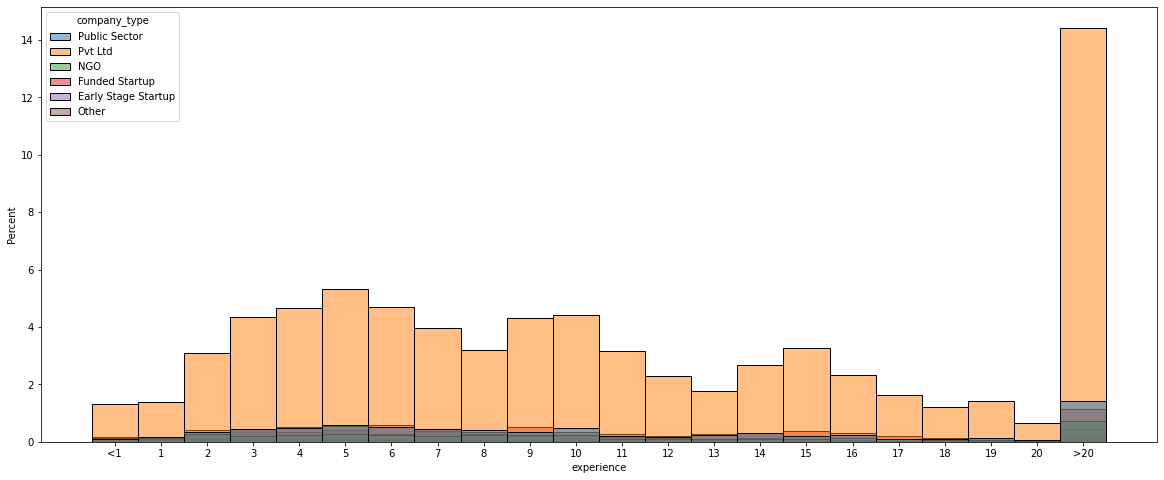

In [23]:
plt.figure(figsize=(20,8))

ordenado = juntos.sort_values("experience", key = natsort_keygen( key=lambda x: x.replace('<1', '0') )) 
# o replace altera o value de uma string, somente para o momento que for ordernado. Nesse caso,
# considerou o "<1" como "0", fiz isso para que ficasse a esquerda.
# o lambda é um função anônima.
sns.histplot(x = "experience", data = ordenado, hue = "company_type", stat = "percent")


###Experience e company size

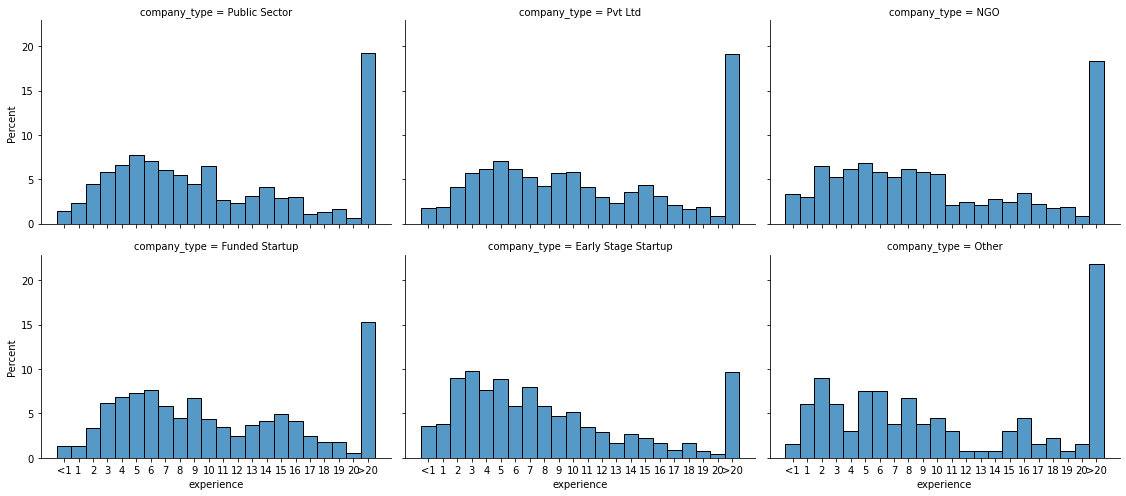

In [24]:
ordenado = juntos.sort_values("experience", key = natsort_keygen(  key=lambda x: x.replace('<1', '0') ))

M = sns.FacetGrid(ordenado, col="company_type", col_wrap = 3, height = 3.5, aspect = 1.5)
figura = M.map(sns.histplot, "experience", stat = "percent")



# Não aparece NaN por algum motivo.
# Coincidemente a Hue está em ordem em ordem alfabética, com other no final
# Parece que que 20> vem antes do 20, mas, na realidade, é 20 e >20.

### Experiência e training hours

[Text(0.5, 0, '0'), Text(1.5, 0, '1')]

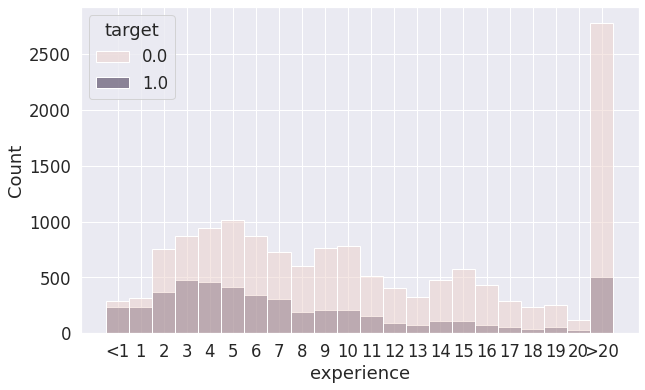

In [55]:
plt.figure(figsize=(10,6))
ordenado = juntos.sort_values("experience", key = natsort_keygen(  key=lambda x: x.replace('<1', '0') ))

sns.histplot(data = ordenado, x = ordenado["experience"], hue = ordenado["target"])

##Experiência relevante pareada com outras variáveis

### E.R. e company size

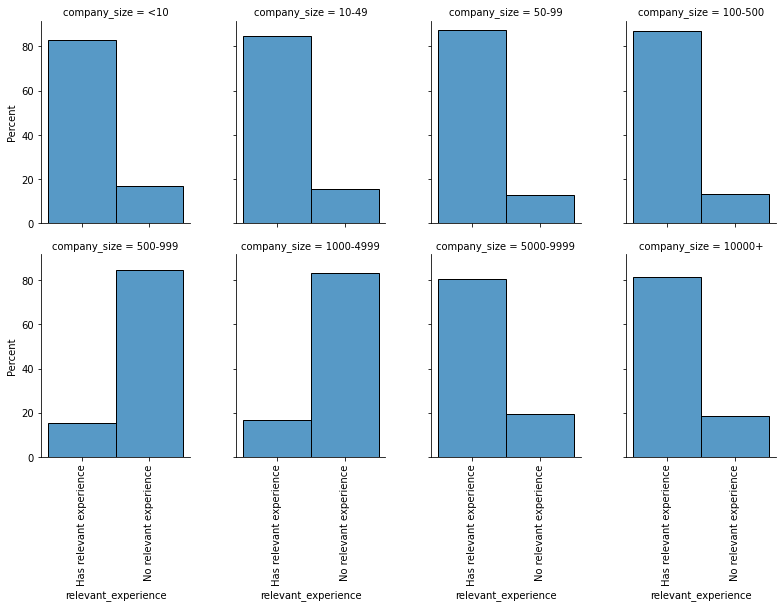

In [ ]:
ordenado = juntos.sort_values("company_size", key = natsort_keygen(  key=lambda x: x.replace('<10', '0') ))

M = sns.FacetGrid(ordenado, col="company_size", col_wrap = 4, height = 3.5, aspect = 0.8)
figura = M.map(sns.histplot, "relevant_experience", stat = "percent", bins = 20).set_xticklabels(rotation = 90)
# Parece que haveria um padrão do tamanho da empresa e experiência relevante,
# mas, curiosamente, de 1000-4999 há um inversão e depois volta ao padrão.
# Engraçado como rodeia os 80% né?

### E.R. e company type

In [ ]:
teste = juntos["company_type"].value_counts()
teste

Pvt Ltd                10958
Funded Startup          1098
Public Sector           1082
Early Stage Startup      668
NGO                      574
Other                    133
Name: company_type, dtype: int64

In [ ]:
lista = teste.index
comprimento = len(lista)
ordem_nova = list(range(comprimento))
ordem_nova

[0, 1, 2, 3, 4, 5]

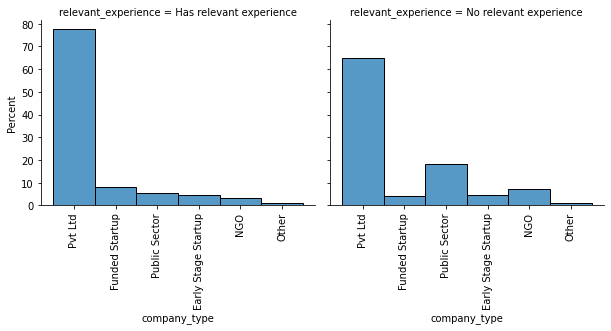

In [ ]:
ordenado = juntos.sort_values("company_type", key = natsort_keygen(  key=lambda x: x.replace(lista, ordem_nova) ))
# ordenando a coluna "company_type" do df "juntos" usando como key (algoritmo?) o natsort_keygen() que 
# usa um próprio pro default, mas eu coloquei a condição consideras as seguintes strings como outras
# no momento que fosse compará-las para ordená-las.
# Ai coloco isso em um df novo chamado "ordenado"

M = sns.FacetGrid(ordenado, col="relevant_experience", col_wrap = 3, height = 3.5, aspect = 1.2)
figura = M.map(sns.histplot, "company_type", stat = "percent", bins = 20,
               hue_order = juntos["company_type"].value_counts().index).set_xticklabels(rotation = 90)


 
plt.show()

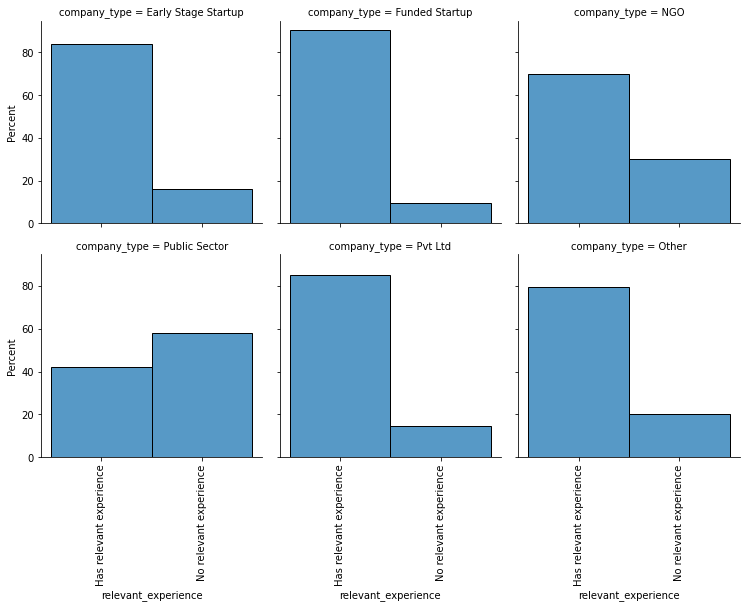

In [ ]:
ordenado = juntos.sort_values("company_type", key = natsort_keygen(  key=lambda x: x.replace("Other", "Z") ))

M = sns.FacetGrid(ordenado, col="company_type", col_wrap = 3, height = 3.5, aspect = 1)
figura = M.map(sns.histplot, "relevant_experience", stat = "percent", bins = 20).set_xticklabels(rotation = 90)

 
plt.show()

### E.R. e horas de treinamento

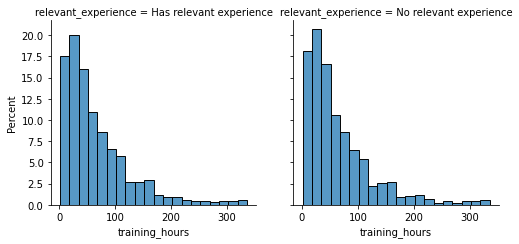

In [ ]:
M = sns.FacetGrid(juntos, col="relevant_experience", col_wrap = 3, height = 3.5, aspect = 1)
figura = M.map(sns.histplot, "training_hours", stat = "percent", bins = 20)

 
plt.show()

#### Separando por curso

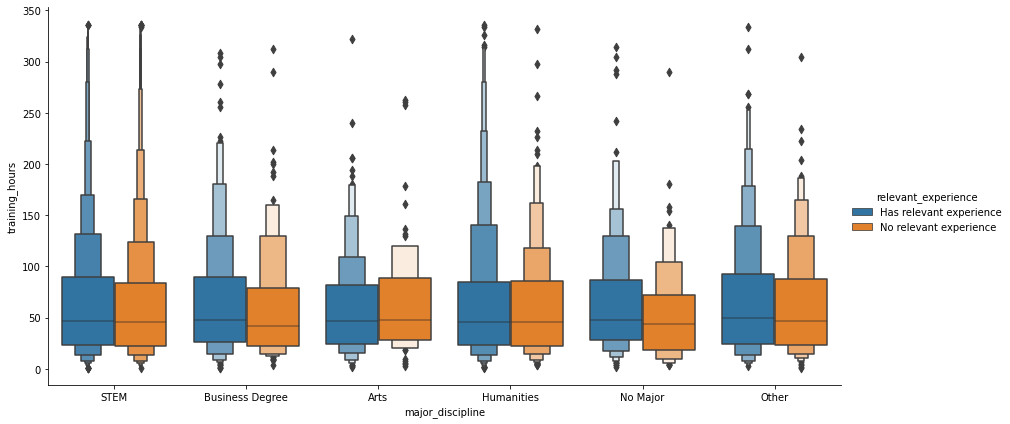

In [ ]:
# Reproduzindo aqui o que eu percebi no outro.
sns.catplot(x="major_discipline", y="training_hours", hue = "relevant_experience",
               data = juntos, kind="boxen", height = 6, aspect= 2)
# Como interpretar esse gráfico 
# https://towardsdatascience.com/letter-value-plot-the-easy-to-understand-boxplot-for-large-datasets-12d6c1279c97
# Vão se fazendo mediana das medianas (mediana, quartil, octil etc) e isso é interrompido 
# quando houver elementos do conjunto do último til para o penúltimo que estão fora do 
# intervalo de confiança de 95%, aí esse último til nem é plotado.

###E.R. e curso

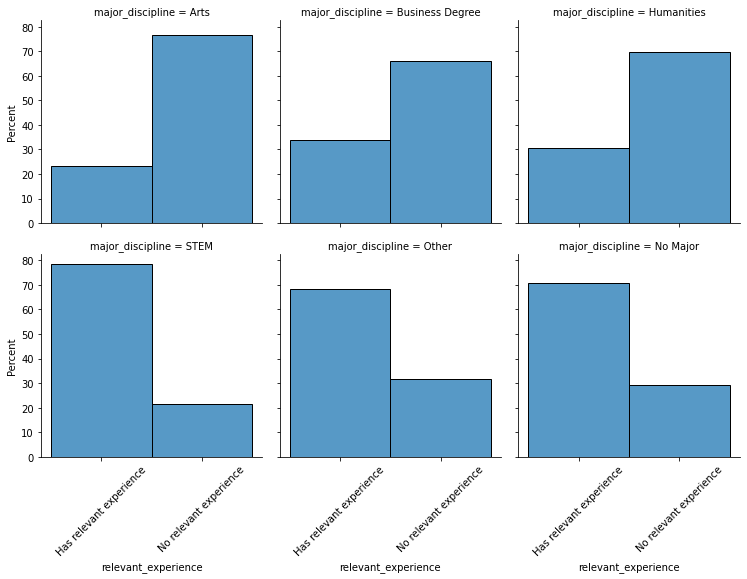

In [ ]:
ordenado = juntos.sort_values("major_discipline", key = natsort_keygen(  key=lambda x: x.replace(["Other","No Major"], ["Y","Z"]) ))

M = sns.FacetGrid(ordenado, col="major_discipline", col_wrap = 3, height = 3.5, aspect = 1)
figura = M.map(sns.histplot, "relevant_experience", stat = "percent", bins = 20).set_xticklabels(rotation=45)

 
plt.show()
# Engraçado, pois parece que experiência relevante não é um fator para o training hours.

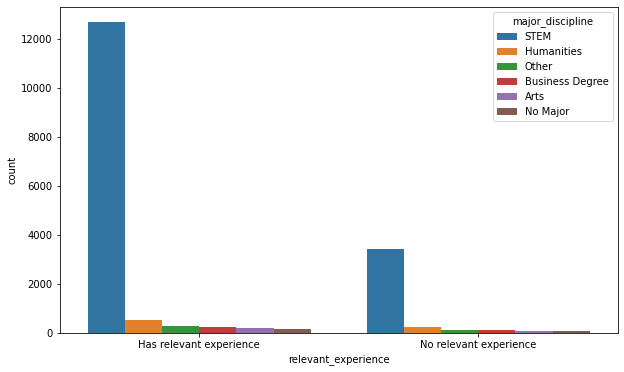

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = "relevant_experience", data = juntos, hue = "major_discipline",
              hue_order = juntos["major_discipline"].value_counts().index)
# Arts e no major beiram a irrelevância

## Horas de treino e curso da faculdade

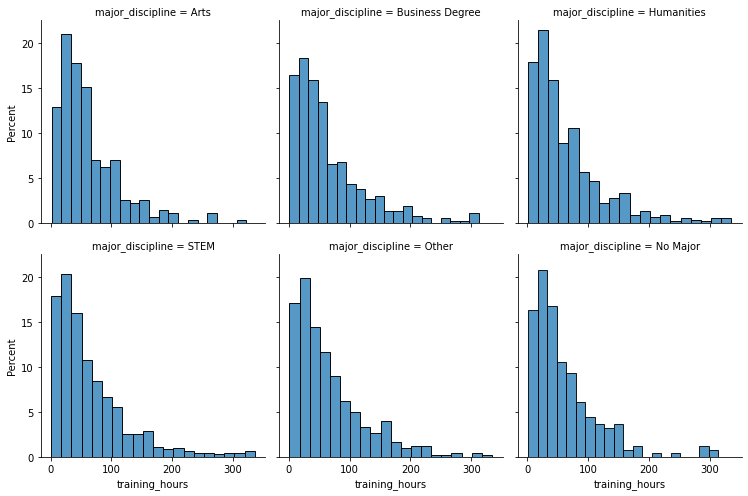

In [ ]:
ordenado = juntos.sort_values("major_discipline", key = natsort_keygen(  key=lambda x: x.replace(["Other","No Major"], ["Y","Z"]) ))

M = sns.FacetGrid(ordenado, col="major_discipline", col_wrap = 3, height = 3.5, aspect = 1)
figura = M.map(sns.histplot, "training_hours", stat = "percent", bins = 20)

 
plt.show()

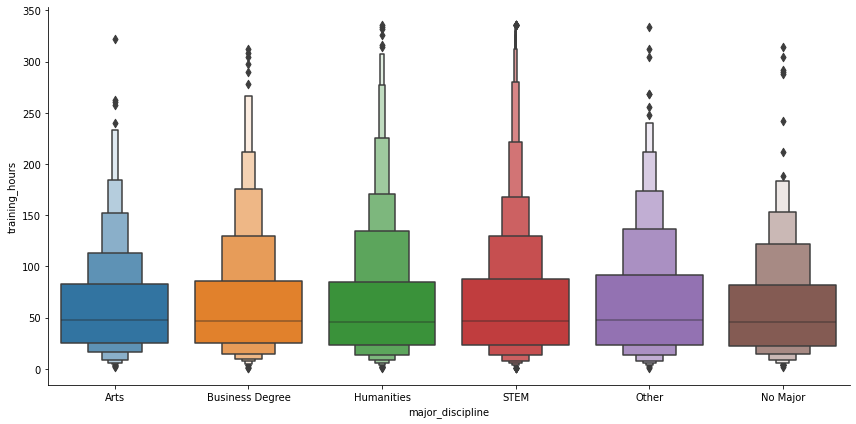

In [ ]:
ordenado = juntos.sort_values("major_discipline", key = natsort_keygen(  key=lambda x: x.replace(["Other","No Major"], ["Y","Z"]) ))

sns.catplot(x="major_discipline", y="training_hours",
               data = ordenado, kind="boxen", height = 6, aspect= 2)


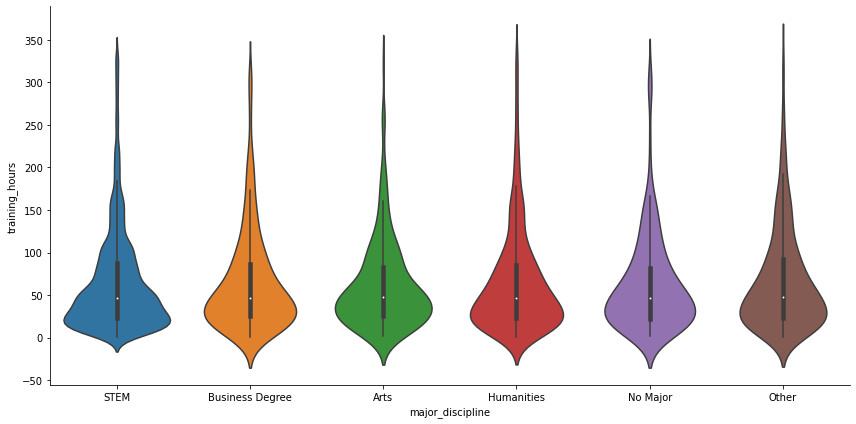

In [ ]:
sns.catplot(x="major_discipline", y="training_hours",
               data = juntos, kind="violin", height = 6, aspect= 2)
# Não sei de onde vem os valores negativos e os acima de 336. É uma projeção???
# No próprio site deles os outliers estão errados tbm kkkkkkk
# https://seaborn.pydata.org/generated/seaborn.catplot.html#seaborn.catplot

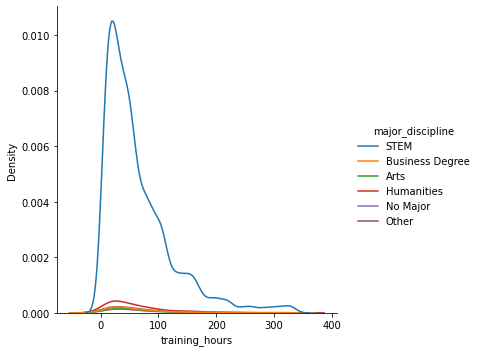

In [ ]:
sns.displot(data=juntos, x="training_hours", hue="major_discipline", kind="kde")
# como a densidade envolve a área e tem um valores de x negativos, isso deve explicar o baixo pico. Ou não,
# somando as áreas (densidade vezes largura do eixo x) deveria somar para cada um dos hue, não?
# troque o kind = "kde" por kind = "hist", deve ajudar a evidenciar meu ponto.

## Heatmap entre as variáveis

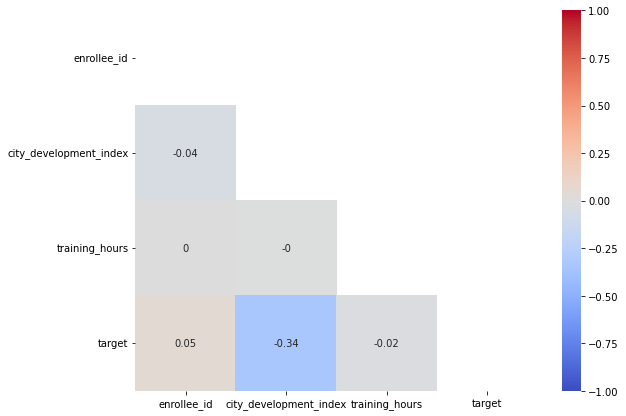

In [ ]:
plt.figure(figsize=(9,7))

corr = juntos.corr()

# aqui criamos uma matriz com o mesmo formato mas preenchida com zeros
mask = np.zeros_like(corr)


# aqui estamos preenchendo todos os pontos da diagonal pra cima com "1"
# dessa forma onde tem o 1 não vai aparecer no gráfico 
mask[np.triu_indices_from(mask)] = True


# aqui criamos o heatmap com o parâmetro mask para esconder a parte de cima
sns.heatmap(corr, vmax=1, vmin=-1, center=0, annot=np.round(corr.values, 2), cmap='coolwarm', mask=mask) 
plt.show()

## Tamanho e tipo de empresa

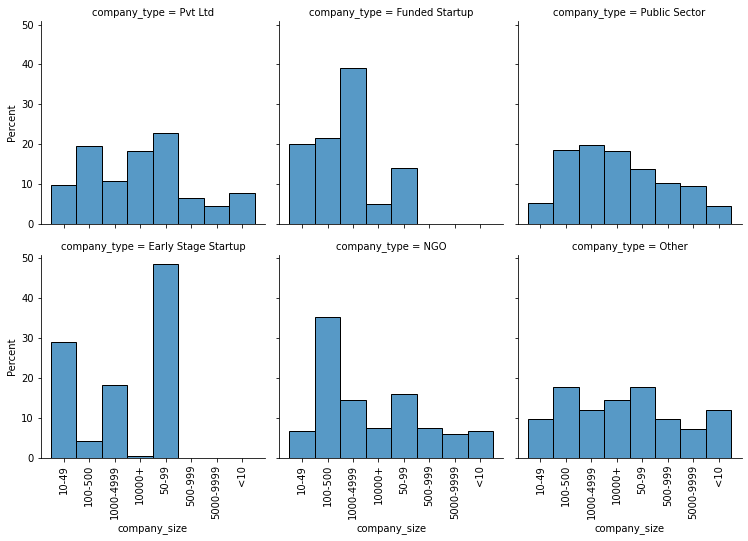

In [ ]:
ordenado = juntos.sort_values("company_size")

M = sns.FacetGrid(ordenado, col="company_type", col_wrap = 3, height = 3.5, aspect = 1)
M.map(sns.histplot, "company_size", stat = "percent").set_xticklabels(rotation=90)

plt.show()
# porque esse mostra errado?

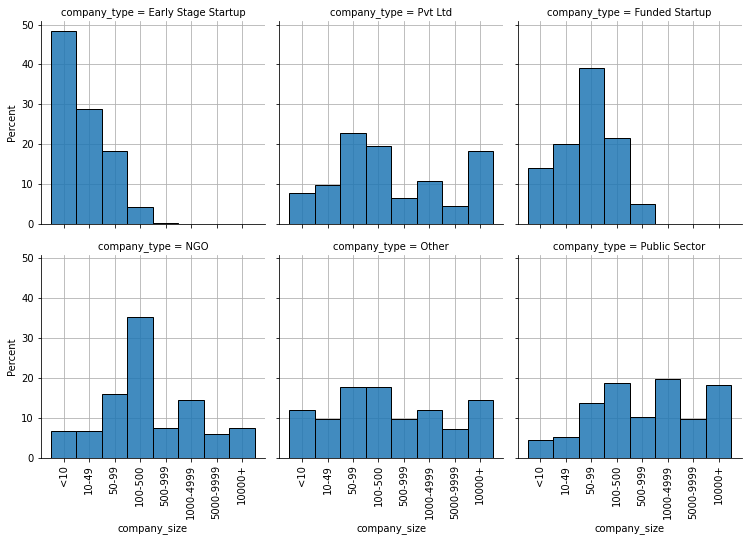

In [ ]:
ordenado = juntos.sort_values("company_size", key = natsort_keygen(  key=lambda x: x.replace('<10', '0'), alg = ns.NANLAST )) #alg é usando um que deixa o NaN por último

lista = ordenado["company_size"].unique()


M = sns.FacetGrid(ordenado, col="company_type", col_wrap = 3, height = 3.5, aspect = 1)
M = M.map(sns.histplot, "company_size", stat = "percent", alpha = 0.85 ) # No .map todos os kwargs são passadas para a função de plotagem.

M.axes[5].set_xticks([0,1,2,3,4,5,6,7])       # Só preciso definir em 1, pois é compartilhado pro outros e estava dando um erro antes muito estranho
  # em que sumia 4 ticks juntos com suas linhas de grade, então botei elas de novo junto com os labels.

for ax in M.axes: # M.axes é igual a M.figure.axes, pq axes está dentro da figura.
  ax.grid(True, alpha = 1)
  ax.set_xticklabels(lista, rotation = 90)
  ax.set_axisbelow(True)

#https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
# Foda que os set_xticks não está nos métodos né?
# pelo menos não nos métodos do atributo "AxesSubplot"
# e nem sei como procurar por isso, foi bastante tentativa e erro
# parece que seriam os mesmos atributos do facet grid?
plt.show()

## Tempo desde o último emprego e querer mudar ou não de emprego

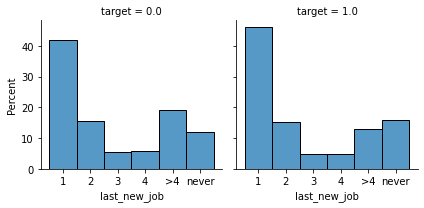

In [ ]:
ordenado = juntos.sort_values("last_new_job")


M = sns.FacetGrid(ordenado, col="target")
M.map(sns.histplot, "last_new_job", stat = "percent", bins = 20)
plt.show()

## Gênero, training hours, city e target

In [ ]:
# Convertendo os valores de target para string, pois senão o eixo x iria de 0 a 1, mas tendo ticks para
# valores intermediários.

target_to_string = juntos.copy()
target_to_string.dropna(axis = 0, inplace = True, subset = ["target"]) # tira os nan's por linha da coluna target
target_to_string["target"] = target_to_string["target"].astype(str) # ai converte tudo que sobra pra string, ai foi tirado o nan
# pq senão viraria string
target_to_string = target_to_string.sort_values("target") # e agora eu ordeno

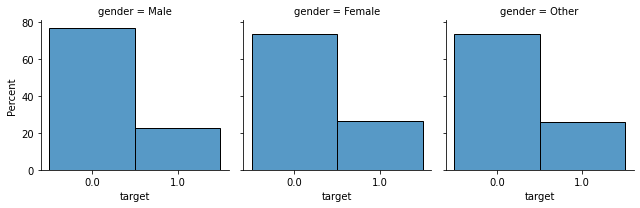

In [ ]:
M = sns.FacetGrid(target_to_string, col="gender")
M.map(sns.histplot, "target", stat = "percent")
plt.show()

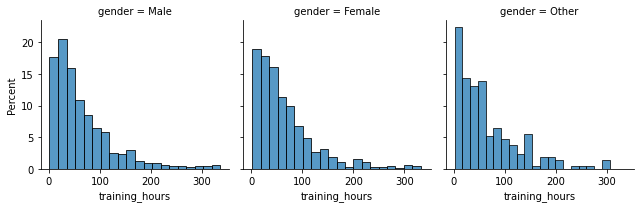

In [ ]:
M = sns.FacetGrid(juntos, col="gender")
M.map(sns.histplot, "training_hours", stat = "percent", bins = 20)
plt.show()

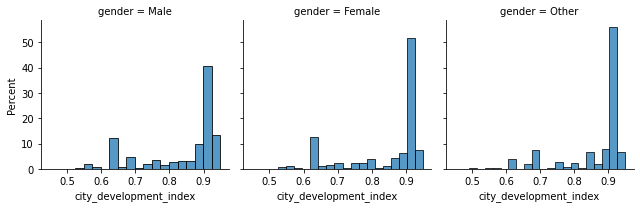

In [ ]:
M = sns.FacetGrid(juntos, col="gender")
M.map(sns.histplot, "city_development_index", stat = "percent", bins = 20)
plt.show()

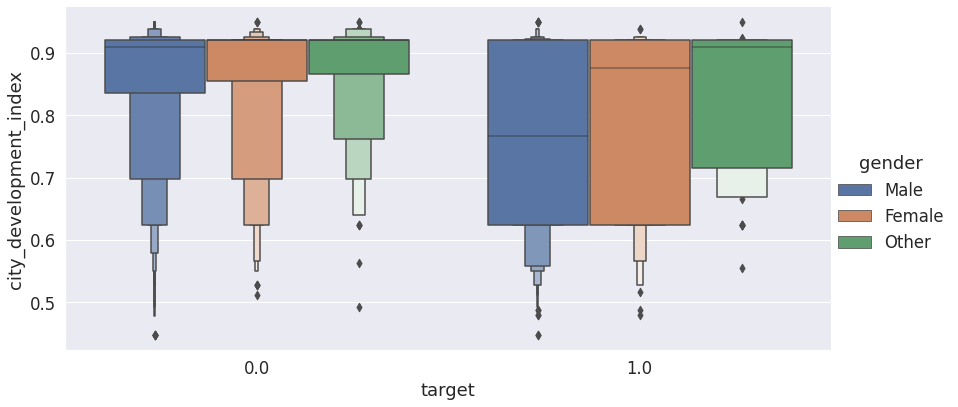

In [56]:
g = sns.catplot(x="target", y="city_development_index", hue="gender",
               data = juntos, kind="boxen", height = 6, aspect= 2)

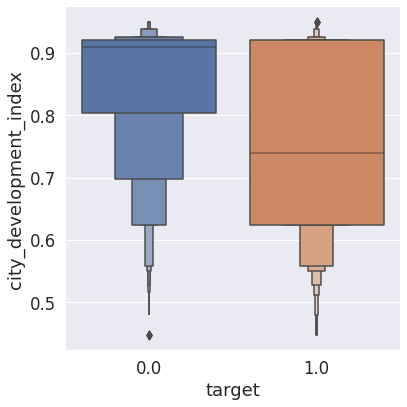

In [57]:
g = sns.catplot(x="target", y="city_development_index",
               data = juntos, kind="boxen", height = 6, aspect= 1)

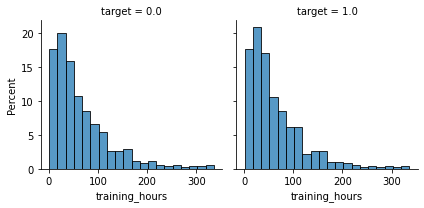

In [ ]:
M = sns.FacetGrid(juntos, col="target")
M.map(sns.histplot, "training_hours", stat = "percent", bins = 20)
plt.show()

# Aprendizagem Supervisionada

In [25]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
# Separando novamente para fazer a aprendizagem

train = juntos.iloc[:19158, :]
test = juntos.iloc[19158:, :]
test.reset_index(drop = True, inplace = True)

In [26]:
encoding_train = pd.get_dummies(train)
encoding_train

,enrollee_id,city_development_index,training_hours,target,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,city_city_105,city_city_106,city_city_107,city_city_109,city_city_11,city_city_111,city_city_114,city_city_115,city_city_116,city_city_117,city_city_118,city_city_12,city_city_120,city_city_121,city_city_123,city_city_126,city_city_127,city_city_128,city_city_129,city_city_13,city_city_131,city_city_133,city_city_134,city_city_136,city_city_138,city_city_139,city_city_14,city_city_140,city_city_141,...,experience_11,experience_12,experience_13,experience_14,experience_15,experience_16,experience_17,experience_18,experience_19,experience_2,experience_20,experience_3,experience_4,experience_5,experience_6,experience_7,experience_8,experience_9,experience_<1,experience_>20,company_size_10/49,company_size_100-500,company_size_1000-4999,company_size_10000+,company_size_50-99,company_size_500-999,company_size_5000-9999,company_size_<10,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_never
0,8949,0.920,36,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,29725,0.776,47,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,11561,0.624,83,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,33241,0.789,52,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,666,0.767,8,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,0.878,42,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
19154,31398,0.920,52,1.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
19155,24576,0.920,44,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
19156,5756,0.802,97,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0


In [27]:
X = encoding_train.drop("target", axis = 1)
y = encoding_train["target"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 42)

## Pelo modelo de árvores



In [ ]:
from sklearn.ensemble import RandomForestClassifier

###Usando entropy:

Eu fiz esse teste que iterou 1642 vezes, levando uns 40 min, porque eu queria ver se haveria muita diferença, mas praticamente não houve do 20 ao 40. 

Previamente, eu tinha escolhido o d ideal para o split de 50 e, depois, usei esse d para pegar seu split ideal, o valor foi de .788 para .789, o que muda muito pouco para esse final que fiz (.791). Eu não sabia se faria muita diferença ou não, pois nunca tinha programado uma aprendizagem antes e queria ver se esperar todo esse tempo para calcular mais opções faria diferença. Como não fez, não pretendo repetir esse método de iterar duas variáveis juntas para as próximas aprendizagens. Contudo, deixarei o código que usei aqui como comentário para esse valor maximizado e uso os valores de d e s que encontrei para fazer um único cálculo.

In [ ]:
#depth_range = range(1, 41)
#samples_range = range(40,61)

#oob_score_max = []
#s_max = []
#oob_max = 0


#for d in depth_range:
#  for s in samples_range:
#    rf = RandomForestClassifier(
#      max_depth=d,
#      n_estimators=200,
#      min_samples_split = s,
#      criterion='entropy',
#      oob_score=True,
#      random_state=42
#  )

#    rf.fit(X_train, y_train)
    
#    if rf.oob_score_ >= oob_max:
#      oob_max = rf.oob_score_
#      alpha = s

#  oob_score_max.append(oob_max)
#  s_max.append(alpha)

In [ ]:
#plt.figure(figsize = (10,10))
#curva, = plt.plot(depth_range, oob_score_max) 

# Por algum motivo misterioso a "," é necessária
# para mudar o tipo da "curva" de "list" para "matplotlib.lines.Line2D"
#plt.show()

In [ ]:
#y_data = curva.get_ydata()

#indice_max = y_data.argmax()


#x_data = curva.get_xdata()
#x_data[indice_max]

#s_max[indice_max]

#print (f"O valor máximo de oob é de {np.amax(y_data):.3},\n usando depth = {x_data[indice_max]} e mínimo sample split = {s_max[indice_max]}.")

In [ ]:
rf = RandomForestClassifier(
    max_depth=37,
    n_estimators=200,
    min_samples_split=51,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(criterion='entropy', max_depth=37, min_samples_split=51,
                       n_estimators=200, oob_score=True, random_state=42)

In [ ]:
y_predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.791
Mean accuracy score: 0.778


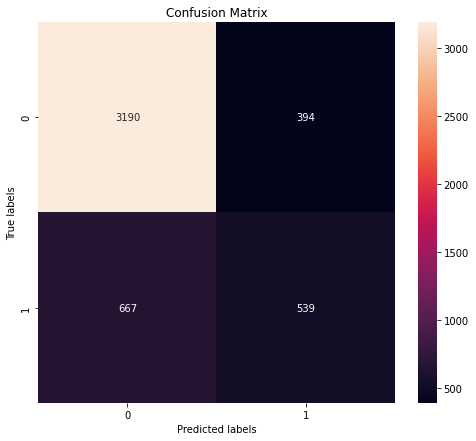

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = rf.predict(X_test)
print('RF usando entropia:')
print(classification_report(y_test, y_pred1))

RF usando entropia:
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      3584
         1.0       0.58      0.45      0.50      1206

    accuracy                           0.78      4790
   macro avg       0.70      0.67      0.68      4790
weighted avg       0.76      0.78      0.77      4790



### Usando Gini

In [ ]:
rf = RandomForestClassifier(
    max_depth=37,
    n_estimators=200,
    min_samples_split=51,
    criterion='gini',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(max_depth=37, min_samples_split=51, n_estimators=200,
                       oob_score=True, random_state=42)

In [ ]:
y_predict = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.787
Mean accuracy score: 0.773


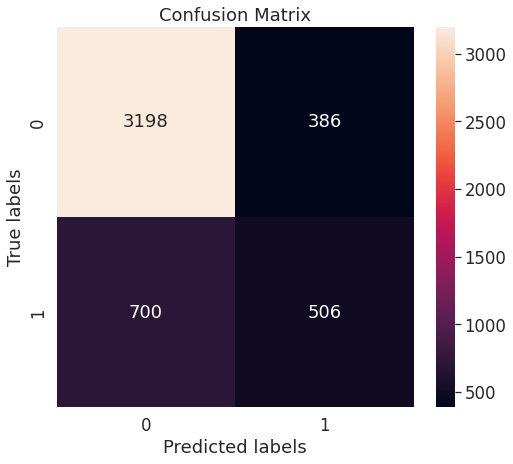

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = rf.predict(X_test)
print('RF usando gini:')
print(classification_report(y_test, y_pred1))

RF usando gini:
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85      3584
         1.0       0.57      0.42      0.48      1206

    accuracy                           0.77      4790
   macro avg       0.69      0.66      0.67      4790
weighted avg       0.76      0.77      0.76      4790



## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k_range = range(1, 120)
scores_list = []

for k in k_range:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)

  scores_list.append(accuracy_score(y_test, y_predict))

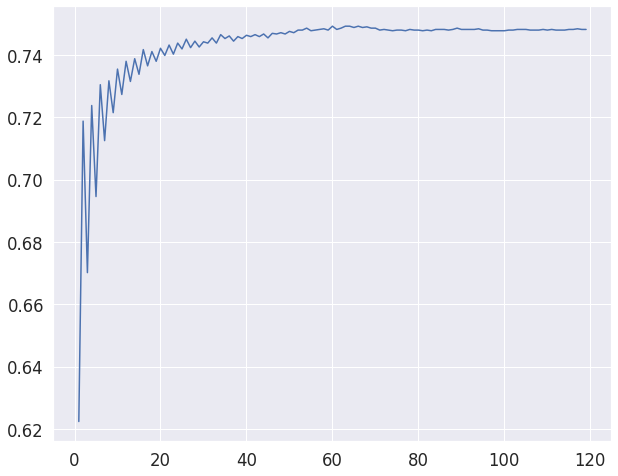

In [ ]:
plt.figure(figsize = (10, 8))
curva, = plt.plot(k_range, scores_list)

# Por algum motivo misterioso a "," é necessária
# para mudar o tipo da "curva" de "list" para "matplotlib.lines.Line2D"
plt.show()

In [ ]:
y_data = scores_list
max_y = np.amax(y_data)
indice_max = y_data.index(max_y)

x_data = k_range
print(x_data[indice_max])

60


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 60)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

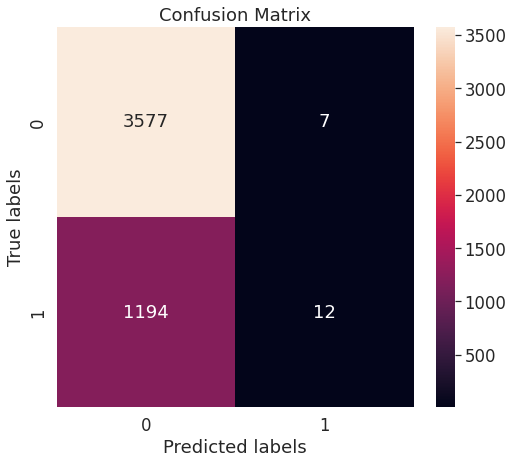

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = knn.predict(X_test)
print('KNN de k = 60:')
print(classification_report(y_test, y_pred1))

KNN de k = 60:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3584
         1.0       0.63      0.01      0.02      1206

    accuracy                           0.75      4790
   macro avg       0.69      0.50      0.44      4790
weighted avg       0.72      0.75      0.65      4790



In [ ]:
k_range = range(1, 80)
f1_0 = []
f1_1 = []
tp, fn, fp, tn = (1,1,1,1)

# Deixei os f1 scores pela metade para não ficarem tão distantes no gráfico
# e poder visualizar melhor

def f1_p (tp,fp,fn):
  precision_p = tp/(tp+fp)
  recall_p = tp/(tp+fn)
  f1_p = 2*(precision_p*recall_p)/(precision_p + recall_p)
  return f1_p

def f1_n (tn,fn,fp):
  precision_n = tn/(tn+fn)
  recall_n = tn/(tn+fp)
  f1_n = 2*(precision_n*recall_n)/(precision_n + recall_n)
  return f1_n

for k in k_range:
  model = KNeighborsClassifier(n_neighbors = k)
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  tp, fn, fp, tn = confusion_matrix(y_test, y_predict).ravel()
  a = f1_p(tp, fp, fn)
  b = f1_n(tn, fn, fp)

  f1_0.append(a)
  f1_1.append(b)

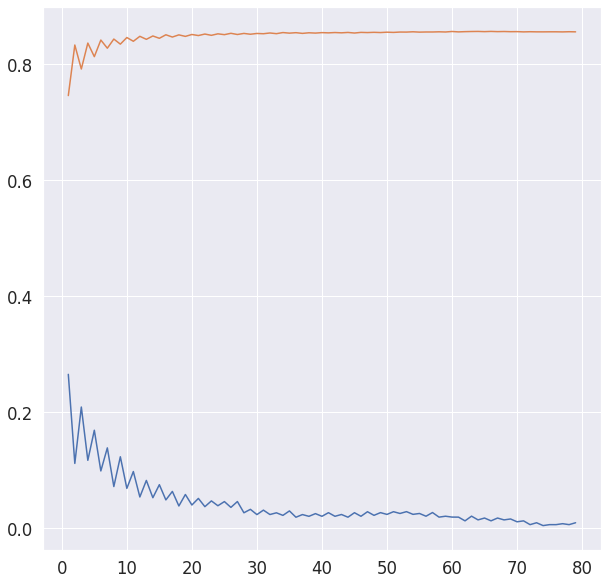

In [ ]:
plt.figure(figsize = (10, 10))
curva_1, = plt.plot(k_range, f1_1)
curva_2, = plt.plot(k_range, f1_0)

plt.show()

In [ ]:
# Com base no gráfico acima, decido botar k = 3

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
y_predict = knn.predict(X_test)

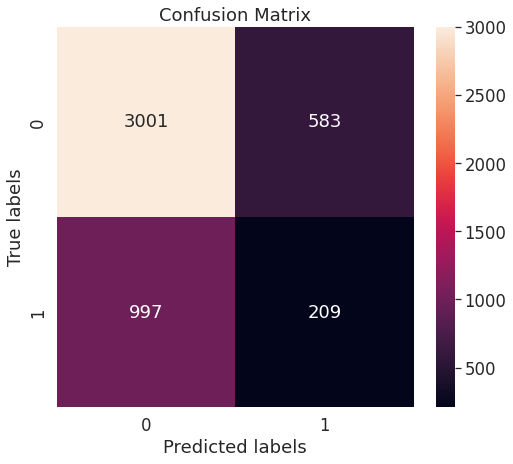

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = knn.predict(X_test)
print('KNN:')
print(classification_report(y_test, y_pred1))

KNN:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79      3584
         1.0       0.26      0.17      0.21      1206

    accuracy                           0.67      4790
   macro avg       0.51      0.51      0.50      4790
weighted avg       0.63      0.67      0.64      4790



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
GNB = GaussianNB()
GNB.fit(X_train, y_train)
y_predict = GNB.predict(X_test)

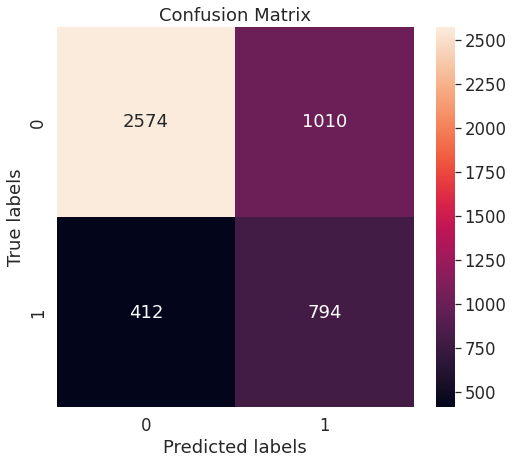

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = GNB.predict(X_test)
print('GNB:')
print(classification_report(y_test, y_pred1))

GNB:
              precision    recall  f1-score   support

         0.0       0.86      0.72      0.78      3584
         1.0       0.44      0.66      0.53      1206

    accuracy                           0.70      4790
   macro avg       0.65      0.69      0.66      4790
weighted avg       0.76      0.70      0.72      4790



## SVM (Suport Vector Machine)

In [28]:
from sklearn import svm

### SVC, kernel = rbf

In [29]:
# Instanciação do classificador: Support Vector Classifier
# Parametro C define a regularização, quanto maior mais rigida será a margem. 
SVC_rbf = svm.SVC(C = 1E9, kernel = "rbf")
SVC_rbf.fit(X_train, y_train)
y_predict = SVC_rbf.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

ValueError: ignored

In [ ]:
y_pred1 = SVC_rbf.predict(X_test)
print('SVC_rbf:')
print(classification_report(y_test, y_pred1))

### SVC, kernel = poly

In [ ]:
SVC_poly = svm.SVC(C = 1E9, kernel = "poly")
SVC_poly.fit(X_train, y_train)
y_predict = SVC_poly.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = SVC_poly.predict(X_test)
print('SVC_poly:')
print(classification_report(y_test, y_pred1))

### SVC, kernel = sigmoid

In [ ]:
SVC_sig = svm.SVC(C = 1E9, kernel = "sigmoid")
SVC_sig.fit(X_train, y_train)
y_predict = SVC_sig.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [ ]:
y_pred1 = SVC_sig.predict(X_test)
print('SVC_sig:')
print(classification_report(y_test, y_pred1))

### SVC, kernel = linear




One vs One

In [30]:
#SVC_linear = svm.SVC(C = 1E9, kernel = "linear")
#SVC_linear.fit(X_train, y_train)
#y_predict = SVC_linear.predict(X_test)

# 2h de duração e não foi concluído, pos o tempo de execução de encerrou.

LinearSVC, kernel = linear (one vs all)

In [31]:
SVC_linear = svm.LinearSVC(C = 1E9, max_iter = 1E6)
SVC_linear.fit(X_train, y_train)
y_predict = SVC_linear.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


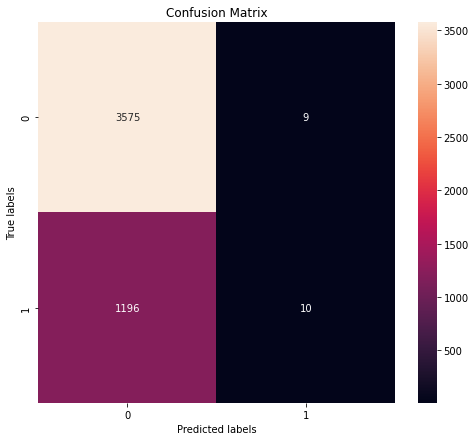

In [32]:
cm = confusion_matrix(y_test, y_predict)
fig, (ax) = plt.subplots(1, 1, figsize=(8,7))
sns.heatmap(cm, annot=True, ax = ax,fmt='g')
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix')
sns.set(font_scale=1.5)
ax.xaxis.set_ticklabels(['0', '1'])
ax.yaxis.set_ticklabels(['0', '1'])
plt.show()

In [33]:
y_pred1 = SVC_linear.predict(X_test)
print('SVC_linear:')
print(classification_report(y_test, y_pred1))

SVC_linear:
              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86      3584
         1.0       0.53      0.01      0.02      1206

    accuracy                           0.75      4790
   macro avg       0.64      0.50      0.44      4790
weighted avg       0.69      0.75      0.64      4790



### Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression # segundo modelo que usaremos

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

In [ ]:
y_train_predict = logreg.predict(X_train)
y_test_predict = logreg.predict(X_test)

print(f'Acurácio no teste: {accuracy_score(y_test, y_test_predict):}')

# Prevendo os resultados

Comparando as métricas de todos os modelos testados, o modelo com o melhor desempenho foi o Random Forest usando o método da entropia com os parâmetros de profundidade máxima igual a 37, o valor mínimo de amostra para dividir um ramo em dois sendo 51 e o nº de árvores sendo 200. Assim, decido usar esse modelo para a predição de "target" do dataset de teste.

In [ ]:
encoding_juntos_2 = pd.get_dummies(juntos_2)
encoding_juntos_2

In [ ]:
train = encoding_juntos_2.iloc[:19158, :]
test = encoding_juntos_2.iloc[19158:, :]
test.reset_index(drop = True, inplace = True)

In [ ]:
X_test = test.drop("target", axis = 1)
y_test = test["target"]

X_train = train.drop("target", axis = 1)
y_train = train["target"]


rf = RandomForestClassifier(
    max_depth=37,
    n_estimators=200,
    min_samples_split=51,
    criterion='entropy',
    oob_score=True,
    random_state=42
)

rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)
y_predict